# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd

# Carrega o CSV
df = pd.read_csv("previsao_de_renda.csv")

# Converte a coluna de data para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

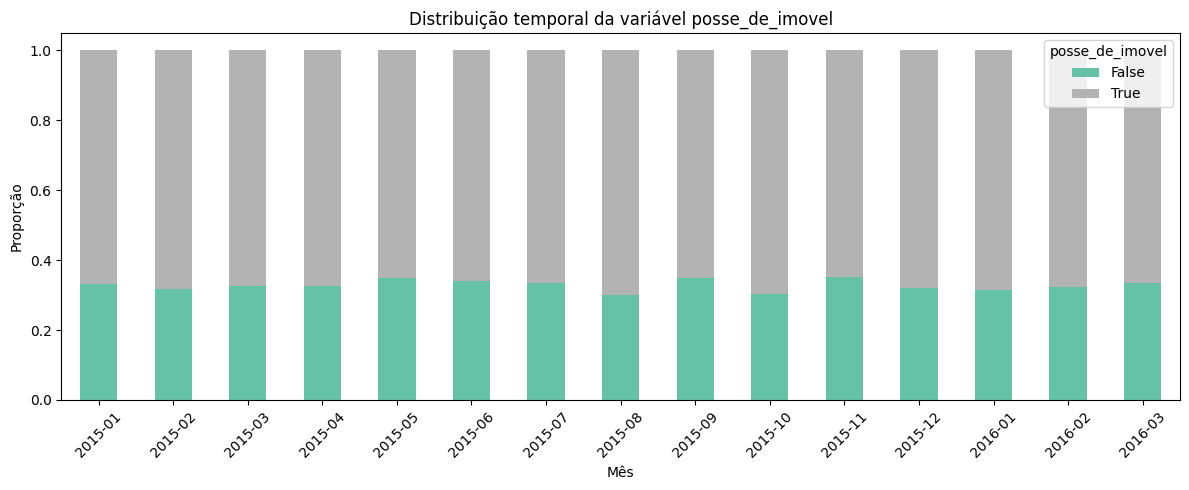

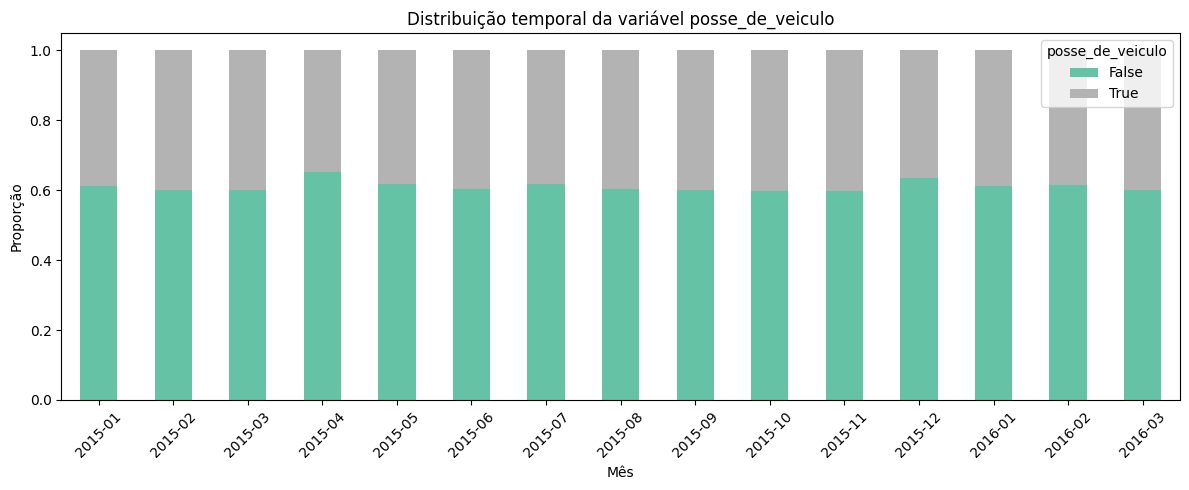

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamento por mês e categoria
qual_vars = ['posse_de_imovel', 'posse_de_veiculo']

for var in qual_vars:
    dist = df.groupby([df['data_ref'].dt.to_period("M"), var]).size().unstack().fillna(0)
    dist_percent = dist.div(dist.sum(axis=1), axis=0)  # Convertendo para proporção

    # Gráfico
    dist_percent.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='Set2')
    plt.title(f'Distribuição temporal da variável {var}')
    plt.xlabel('Mês')
    plt.ylabel('Proporção')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

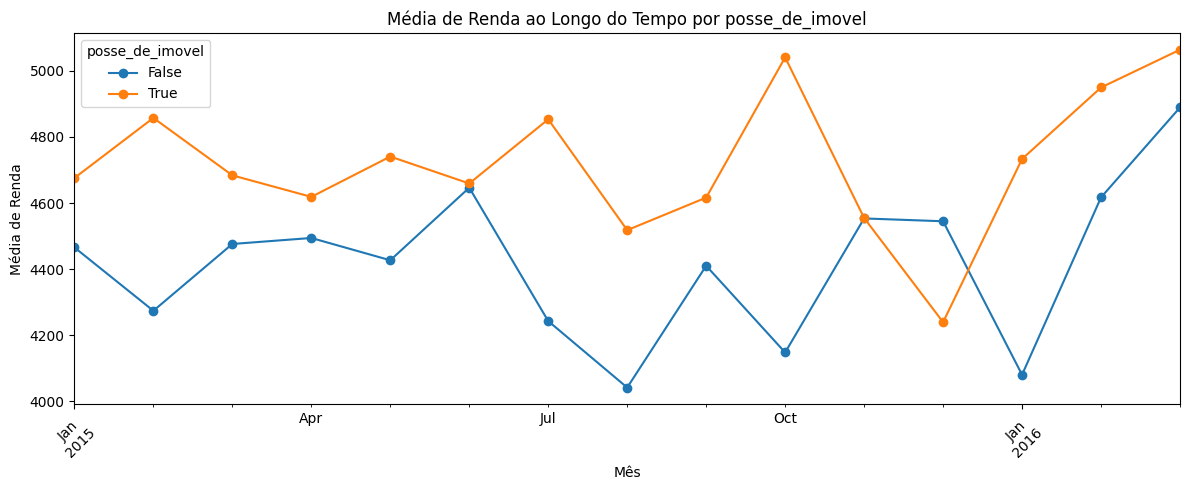

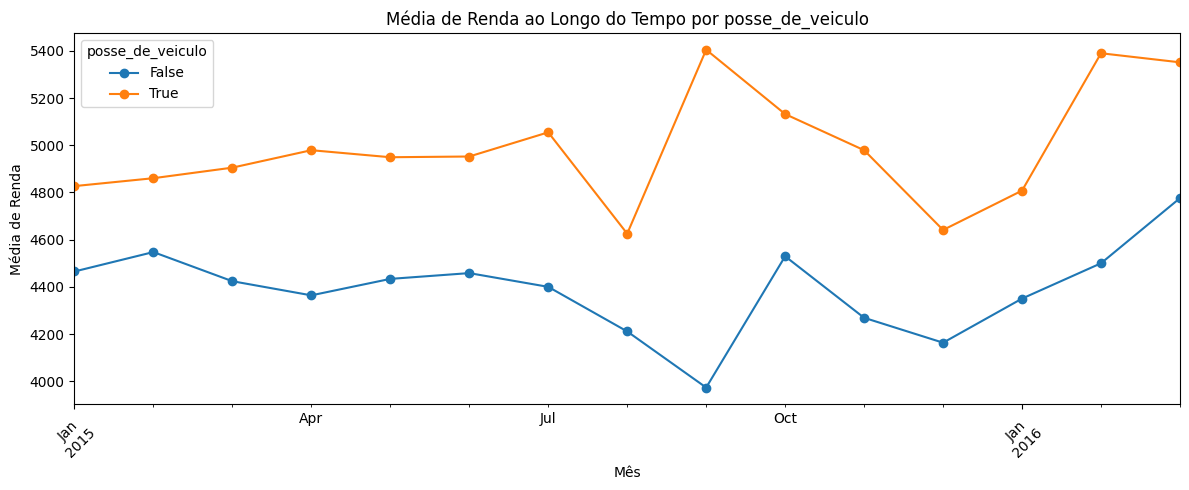

In [3]:
# Gráficos de média de renda por categoria e por mês
for var in qual_vars:
    mean_renda = df.groupby([df['data_ref'].dt.to_period("M"), var])['renda'].mean().unstack()

    mean_renda.plot(figsize=(12, 5), marker='o')
    plt.title(f'Média de Renda ao Longo do Tempo por {var}')
    plt.xlabel('Mês')
    plt.ylabel('Média de Renda')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
